In [2]:
%matplotlib inline

###  Graphviz及pydotplus的安装

#### linux环境：
    *  apt-get install graphviz    ------安装graphviz
    *  conda install -c conda-forge pydotplus   -------------安装pydotplus包
#### windows环境：
*  下载Graphviz  https://graphviz.gitlab.io/_pages/Download/Download_windows.html
*   安装完后 设置环境变量：
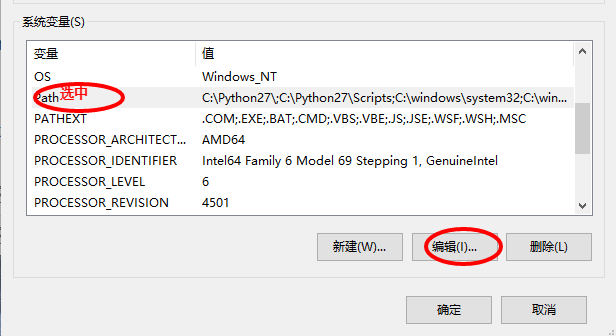
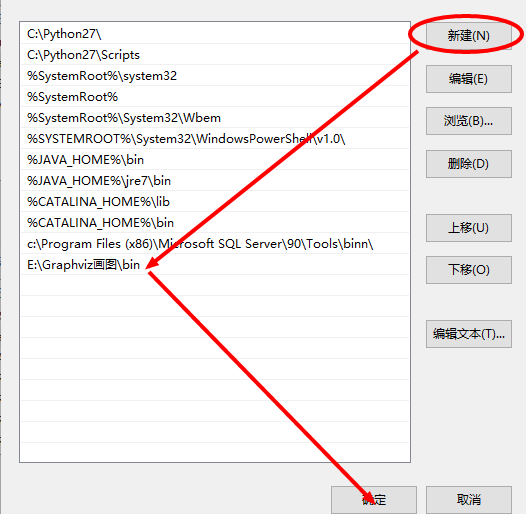
*  conda install -c conda-forge pydotplus   -------------安装pydotplus包


# Plot the decision surface of a decision tree on the iris dataset


Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See `decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.



Automatically created module for IPython interactive environment


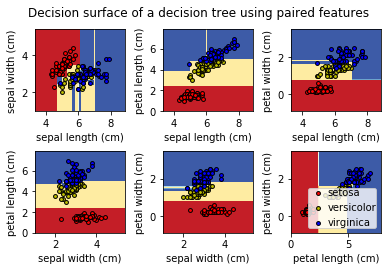

In [7]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

[[3.3 3.4 3.5 ... 8.6 8.7 8.8]
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]
 ...
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]
 [3.3 3.4 3.5 ... 8.6 8.7 8.8]]
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 ...
 [7.6 7.6 7.6 ... 7.6 7.6 7.6]
 [7.7 7.7 7.7 ... 7.7 7.7 7.7]
 [7.8 7.8 7.8 ... 7.8 7.8 7.8]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


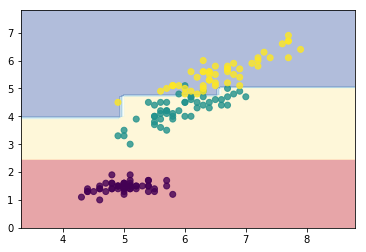

In [14]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 仍然使用自带的iris数据
iris = datasets.load_iris()
#只使用了两个特征，便于在二维平面上表示决策空间的分布
X = iris.data[:, [0, 2]]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)

# 画图
#X[:,0]表示从开始倒结尾元素以默认step=1进行切片，并且取切片的所有元素的第一个元素
#  相当于取了数据第一列的特征
#X[:,1]相当于取了数据第三列的特征
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
print(xx)
print(yy)
#根据Z值的不同确定是在不同的决策空间中
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)
#contour绘制等高线图，contourf不绘制等高线，用不同颜色表示不同高度
plt.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.RdYlBu)
#绘制散点图
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()